# Import everything from model file

In [1]:
from model import *

# Let's see how the data looks like

In [2]:
df_train.head()

,track_id,species
0,F170211_122057_250_G_050.wav,Ae. aegypti
1,F170208_214420_247_G_050.wav,Ae. aegypti
2,F161205_203438_231_G_050.wav,C. pipiens
3,F161219_131712_139_G_050.wav,C. quinquefasciatus
4,F170210_153150_207_G_050.wav,Ae. aegypti


The data is basically sound files in wav format, all of which is labelled according to its species.

In [3]:
file = librosa.load('Wingbeats/Ae. aegypti/wav/F170211_122057_250_G_050.wav', sr = 16000)

# Signal data in form of array

In [4]:
file[0]

array([-0.00032749, -0.00050761, -0.00077212, ...,  0.00041605,
        0.00073713,  0.00056866], dtype=float32)

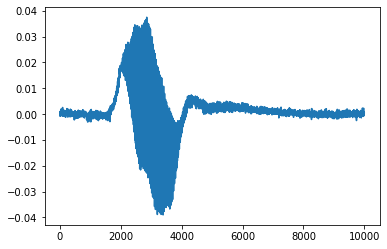

In [5]:
plt.plot(file[0])
plt.show()

In [6]:
_, feature = log_specgram(file[0],file[1], window_size=15) 

# Extracted features

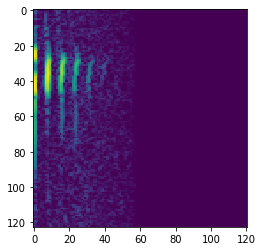

In [7]:
plt.imshow(feature)
plt.show()

In [8]:
def plot_features(x):
    spec = df_train[df_train['track_id'] == x]['species'].item()
    file = librosa.load('Wingbeats/'+str(spec)+'/wav/'+x, sr = 16000)
    _, feature = log_specgram(file[0],file[1], window_size=15) 
    plt.imshow(feature)
    plt.show()

In [9]:
def random_plot():
    for track in df_train.sample(frac=0.0001)['track_id']:
        print(df_train[df_train['track_id'] == track]['species'].item())
        plot_features(track)
    

An. arabiensis


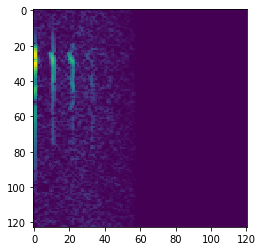

C. quinquefasciatus


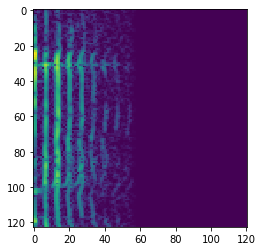

An. gambiae


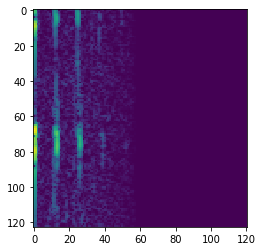

Ae. aegypti


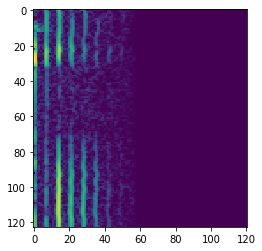

C. pipiens


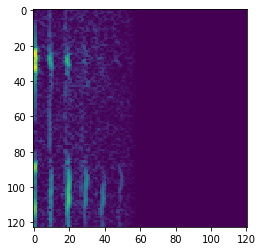

An. gambiae


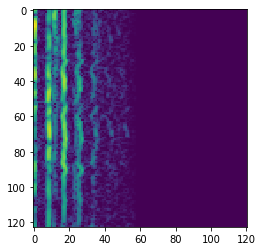

An. arabiensis


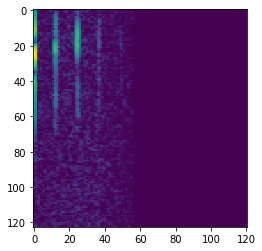

An. gambiae


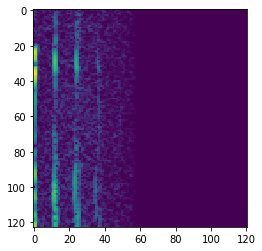

C. pipiens


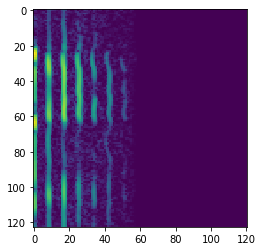

C. pipiens


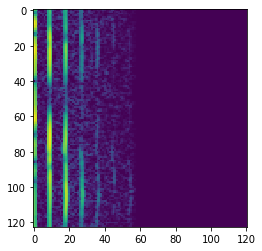

C. quinquefasciatus


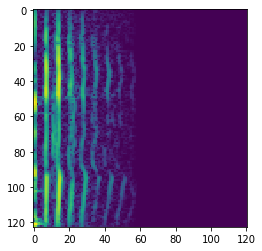

An. gambiae


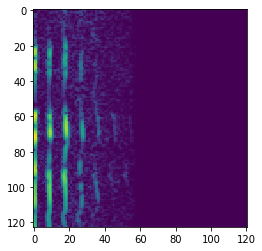

An. gambiae


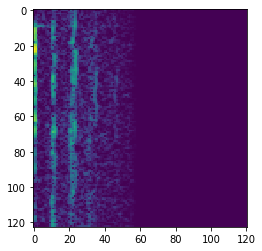

Ae. aegypti


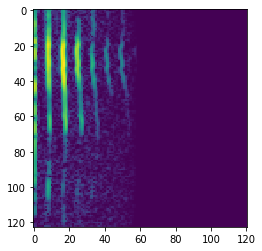

Ae. albopictus


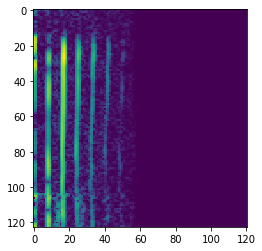

An. gambiae


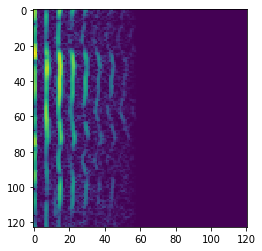

An. arabiensis


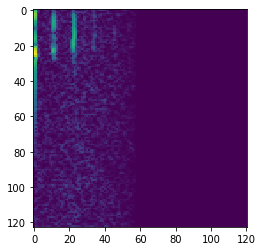

In [10]:
random_plot()

# This is how some of the features for different species look like

# Let's see how our model performs on this data

In [11]:
model = load_model('modelv1.2.1.json','modelv1.2.1.h5')
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

W0817 13:24:28.501419 140345595193152 deprecation.py:506] From /home/yatharthmathur/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0817 13:24:28.502566 140345595193152 deprecation.py:506] From /home/yatharthmathur/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0817 13:24:28.504092 140345595193152 deprecation.py:506] From /home/yatharthmathur/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ 

<tensorflow.python.keras.engine.sequential.Sequential object at 0x7fa43358f5c0> has been loaded.


In [12]:
x_test, y_test = get_test_data()

Enter the list of npy files to load : 0 1


In [14]:
df = pd.read_csv('dataset.csv')

In [15]:
def predict(x):
    folder = df[df['track_id'] == x].species.item()
    file = librosa.load('Wingbeats/'+folder+'/wav/'+x, sr=16000)
    _, data = log_specgram(file[0],file[1])
    data = np.asarray(data).reshape((1,61,161,1))
    #print('Expected species :', folder)
    #print('Predicted species :', labels[int(model.predict_classes(data))], '\n')
    return folder, labels[int(model.predict_classes(data))]

# Predicted values from testing data is stored

In [16]:
predicted = model.predict_classes(x_test)

# Function to plot a confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [23]:
mat = confusion_matrix(y_test, predicted)

In [20]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap='YlGnBu'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = labels
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots(figsize=(5,5))
    im = sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', xticklabels=True, yticklabels=True, ax=ax)
    #ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Expected label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=60, ha="right",
             )
    plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
             )
    return ax

Confusion matrix, without normalization


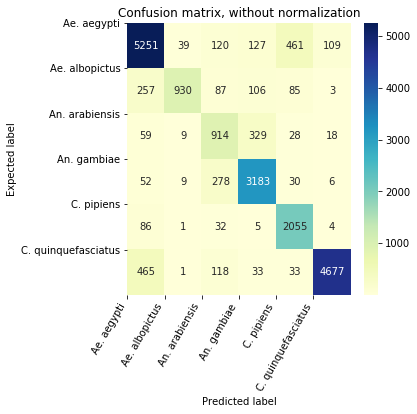

In [21]:
plot_confusion_matrix(y_test, predicted, classes=labels, normalize=False)

# Now we check all the metrics like Precision, Recall and F1 Score of our model

In [24]:
precision_list = []
for i in range(len(mat)):
    true_positives = mat[i][i]
    total_positives = mat.sum(axis=1)[i]
    precision_list.append(true_positives/total_positives)
for i,c in enumerate(precision_list):
    print('Precision for class', labels[i], ':', c)

print('Average precision of our model is :', sum(precision_list)/len(labels))

Precision for class Ae. aegypti : 0.8598329785492058
Precision for class Ae. albopictus : 0.6335149863760218
Precision for class An. arabiensis : 0.6735445836403832
Precision for class An. gambiae : 0.8946037099494097
Precision for class C. pipiens : 0.9413650939074668
Precision for class C. quinquefasciatus : 0.8779801013703773
Average precision of our model is : 0.8134735756321442


In [25]:
recall_list = []
for i in range(len(mat)):
    true_positives = mat[i][i]
    predicted = mat.sum(axis=0)[i]
    recall_list.append(true_positives/predicted)
for i,c in enumerate(recall_list):
    print('Recall for class', labels[i], ':', c)
print('Average recall of our model is :', sum(recall_list)/len(labels))

Recall for class Ae. aegypti : 0.8510534846029173
Recall for class Ae. albopictus : 0.9403437815975733
Recall for class An. arabiensis : 0.5900581020012912
Recall for class An. gambiae : 0.8413957176843775
Recall for class C. pipiens : 0.763372956909361
Recall for class C. quinquefasciatus : 0.9709362673863401
Average recall of our model is : 0.8261933850303101


In [26]:
f1_scores = []
for i in range(len(mat)):
    recall = recall_list[i]
    precision = precision_list[i]
    f1_scores.append(2*precision*recall/(precision+recall))
for i,c in enumerate(f1_scores):
    print('F1-Score for class', labels[i], ':', c)
print('Average F1-score of our model is :', sum(f1_scores)/len(labels))

F1-Score for class Ae. aegypti : 0.8554207053840513
F1-Score for class Ae. albopictus : 0.757020757020757
F1-Score for class An. arabiensis : 0.629043358568479
F1-Score for class An. gambiae : 0.8671843073150798
F1-Score for class C. pipiens : 0.8430769230769231
F1-Score for class C. quinquefasciatus : 0.9221214511041009
Average F1-score of our model is : 0.8123112504115652


# Data set used: https://www.kaggle.com/potamitis/wingbeats